# ***CAR PRICE PREDICTION***

Predicting car price is not just a textbook ML problem. It's the backbone of used-car platforms, dealership pricing engines, and insurance risk models. Inaccurate price predictions can mean millions in lost revenue or dissatisfied customers.

In this project, I:
- Performed exploratory data analysis (EDA) to uncover drivers of car price.
- Cleaned and engineered features to handle categorical and missing data.
- Built a baseline **Linear Regression** model and stress-tested its assumptions.
- Benchmarked against **Random Forest**, a non-linear ensemble model.
- Delivered insights into feature importance and model reliability.

Let's start by importing the required python libraries (pandas, numpy, matplotlib, seaborn for visualization, and scikit-learn for modeling). We will then load the dataset (from kaggle) into a pandas DataFrame.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset (dataset taken from kaggle)
df = pd.read_csv('/content/car details v4.csv')

Next, I explore the dataset in detail to understand the variables, uncover patterns, and identify which features add real predictive value and which can be safely dropped.

In [4]:
df.head(3)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0


In [5]:
df.shape

(2059, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [7]:
df.Make.unique()

array(['Honda', 'Maruti Suzuki', 'Hyundai', 'Toyota', 'Mercedes-Benz',
       'BMW', 'Skoda', 'Nissan', 'Renault', 'Tata', 'Volkswagen', 'Ford',
       'Audi', 'Mahindra', 'MG', 'Jeep', 'Porsche', 'Kia', 'Land Rover',
       'Volvo', 'Maserati', 'Jaguar', 'Isuzu', 'Fiat', 'MINI', 'Ferrari',
       'Mitsubishi', 'Datsun', 'Lamborghini', 'Chevrolet', 'Ssangyong',
       'Rolls-Royce', 'Lexus'], dtype=object)

In [8]:
df.Model.unique()

array(['Amaze 1.2 VX i-VTEC', 'Swift DZire VDI', 'i10 Magna 1.2 Kappa2',
       ..., 'Ritz Vxi (ABS) BS-IV', 'XUV500 W8 [2015-2017]',
       'Figo Duratec Petrol ZXI 1.2'], dtype=object)

In [9]:
df['Fuel Type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric', 'CNG + CNG',
       'Hybrid', 'Petrol + CNG', 'Petrol + LPG'], dtype=object)

In [10]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [11]:
df['Location'].unique()

array(['Pune', 'Ludhiana', 'Lucknow', 'Mangalore', 'Mumbai', 'Coimbatore',
       'Bangalore', 'Delhi', 'Raipur', 'Kanpur', 'Patna', 'Vadodara',
       'Hyderabad', 'Yamunanagar', 'Gurgaon', 'Jaipur', 'Deoghar', 'Agra',
       'Goa', 'Warangal', 'Jalandhar', 'Noida', 'Ahmedabad', 'Mohali',
       'Navi Mumbai', 'Ghaziabad', 'Kolkata', 'Zirakpur', 'Nagpur',
       'Thane', 'Faridabad', 'Ranchi', 'Chandigarh', 'Amritsar',
       'Chennai', 'Udupi', 'Panvel', 'Jamshedpur', 'Aurangabad',
       'Rudrapur', 'Nashik', 'Varanasi', 'Salem', 'Dehradun', 'Valsad',
       'Haldwani', 'Dharwad', 'Surat', 'Indore', 'Karnal', 'Panchkula',
       'Mysore', 'Rohtak', 'Ambala Cantt', 'Samastipur', 'Unnao',
       'Purnea', 'Bhubaneswar', 'Kheda', 'Kollam', 'Meerut', 'Ernakulam',
       'Kharar', 'Mirzapur', 'Bhopal', 'Gorakhpur', 'Guwahati',
       'Allahabad', 'Muzaffurpur', 'Faizabad', 'Kota', 'Pimpri-Chinchwad',
       'Dak. Kannada', 'Ranga Reddy', 'Bulandshahar', 'Roorkee',
       'Siliguri'], dty

In [12]:
df['Color'].unique()

array(['Grey', 'White', 'Maroon', 'Red', 'Blue', 'Orange', 'Silver',
       'Brown', 'Black', 'Bronze', 'Gold', 'Beige', 'Green', 'Yellow',
       'Purple', 'Others', 'Pink'], dtype=object)

In [13]:
df['Owner'].unique()

array(['First', 'Second', 'Third', 'Fourth', 'UnRegistered Car',
       '4 or More'], dtype=object)

In [14]:
df['Seller Type'].unique()

array(['Corporate', 'Individual', 'Commercial Registration'], dtype=object)

In [15]:
df['Engine'].unique()

array(['1198 cc', '1248 cc', '1197 cc', '2393 cc', '1373 cc', '1991 cc',
       '1995 cc', '1798 cc', '1461 cc', '999 cc', '1462 cc', '1956 cc',
       '998 cc', '796 cc', '1591 cc', '1086 cc', '1199 cc', '1582 cc',
       nan, '1047 cc', '2143 cc', '1968 cc', '1796 cc', '2498 cc',
       '2494 cc', '2179 cc', '1998 cc', '1497 cc', '1196 cc', '2755 cc',
       '1799 cc', '1493 cc', '1399 cc', '1498 cc', '1997 cc', '1598 cc',
       '2993 cc', '2995 cc', '2982 cc', '1353 cc', '1984 cc', '2967 cc',
       '2609 cc', '1950 cc', '1999 cc', '4663 cc', '1451 cc', '2354 cc',
       '1396 cc', '2987 cc', '2997 cc', '1336 cc', '4163 cc', '3496 cc',
       '799 cc', '2979 cc', '4806 cc', '2996 cc', '1061 cc', '2184 cc',
       '2497 cc', '2999 cc', '1948 cc', '3436 cc', '2925 cc', '2489 cc',
       '1368 cc', '1797 cc', '1298 cc', '2694 cc', '1186 cc', '1364 cc',
       '3498 cc', '3982 cc', '1120 cc', '2523 cc', '1988 cc', '3902 cc',
       '624 cc', '2477 cc', '3198 cc', '5204 cc', '814 cc', '

From the initial data exploration, we observed a mix of **categorical variables** (Make, Model, Transmission, Fuel Type, etc.) and **numerical variables** (Engine, Power, Torque, etc.). Understanding these distributions is essential for selecting meaningful features for regression.  

### Features Included  
- **Price** → Target variable (dependent feature).  
- **Year** → Reflects the age of the car, a key factor in depreciation.  
- **Kilometers Driven** → Indicates usage and wear, directly affecting resale value.  
- **Fuel Type** → Different fuels (Petrol, Diesel, CNG, Electric) have varying market demand.  
- **Max Power / Max Torque** → Capture performance characteristics of the vehicle.  
- **Engine Capacity (CC)** → Larger engines often correspond to higher prices.  
- **Seating Capacity** → Determines vehicle type (compact vs SUV), influencing value.  
- **Fuel Tank Capacity** → Related to vehicle design and usability, potentially impacting price.  

### Features Omitted  
- **Model** → Too high cardinality (many unique categories), leading to data sparsity. Differences across models can often be captured indirectly by performance features (Engine, Power, Seating).  
- **Location** → In this dataset, car prices are not significantly affected by location, unlike housing datasets.  
- **Color / Seller Type** → Minimal impact on price prediction; mostly cosmetic or marketing attributes.  
- **Length, Width, Height** → Correlated with seating capacity and engine specifications, making them redundant.  

By carefully pruning irrelevant or noisy features, we improve model generalization and reduce overfitting while retaining core attributes that truly drive car pricing.  


In [16]:
df.isnull().sum()

,0
Make,0
Model,0
Price,0
Year,0
Kilometer,0
Fuel Type,0
Transmission,0
Location,0
Color,0
Owner,0


Handling missing values is critical in regression tasks. For numerical features, I use median imputation; for categorical variables, I use mode/group-based imputation. This ensures the dataset is consistent and ready for encoding.

In [17]:
cols_to_drop = ['Model','Location','Color','Seller Type','Length','Width','Height']

df = df.drop(cols_to_drop,axis=1)

In [18]:
cols_to_impute = ['Engine','Max Power','Max Torque','Seating Capacity','Fuel Tank Capacity','Drivetrain']

for col in cols_to_impute:
  df[col] = df.groupby('Make')[col].transform(
      lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x)
  )



In [19]:
df['Fuel Tank Capacity'].isnull().sum()

np.int64(1)

In [20]:
df['Fuel Tank Capacity'].fillna(df['Fuel Tank Capacity'].median(),inplace=True)

In [ ]:
df.isnull().sum()

,0
Make,0
Price,0
Year,0
Kilometer,0
Fuel Type,0
Transmission,0
Owner,0
Engine,0
Max Power,0
Max Torque,0


 The raw dataset stores performance specs (Engine, Max Power, Max Torque) in string formats like `"1498 cc"` or `"103.2 bhp @ 6000 rpm"`. These need to be cleaned and converted into numerical values before modeling.  

- **Engine** → Removed the `"cc"` suffix and converted values to numeric.  
- **Max Power** → Split into two useful features:  
  - `bhp`: brake horsepower (numeric strength of the engine).  
  - `rpm_power`: engine speed at which maximum power is achieved.  
- **Max Torque** → Similarly split into:  
  - `Nm`: torque in Newton-meters.  
  - `rpm_torque`: engine speed at which maximum torque is achieved.  

Finally, the original string columns (`Max Power`, `Max Torque`) were dropped to avoid redundancy.  

This transformation not only standardizes the data but also **extracts deeper signals** from text-heavy fields, allowing the model to learn performance–price relationships more effectively.  


In [21]:
#Engine

df['Engine'] = df['Engine'].astype(str).str.replace('cc','',regex=False).str.strip()
df['Engine'] = pd.to_numeric(df['Engine'],errors='coerce')

In [22]:
# Max Power

df['bhp'] = df['Max Power'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
df['rpm_power'] = df['Max Power'].astype(str).str.extract(r'@\s*(\d+\.?\d*)').astype(float)

In [23]:
df['rpm_power'].isnull().sum()

np.int64(4)

In [24]:
df['rpm_power'] = df.groupby('Make')['rpm_power'].transform(lambda x: x.fillna(x.median()))

In [25]:
# Max Torque
df['Nm'] = df['Max Torque'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
df['rpm_torque'] = df['Max Torque'].astype(str).str.extract(r'@\s*(\d+\.?\d*)').astype(float)

In [26]:
print(df[['Engine','Seating Capacity','Fuel Tank Capacity','bhp','rpm_power','Nm','rpm_torque']].dtypes)

Engine                  int64
Seating Capacity      float64
Fuel Tank Capacity    float64
bhp                   float64
rpm_power             float64
Nm                    float64
rpm_torque            float64
dtype: object


In [27]:
col_to_drop = ['Max Power','Max Torque']

df = df.drop(col_to_drop,axis=1)

To identify which features have the strongest linear relationship with **Price**, I compute the correlation matrix and sort it against the target variable.  

This step helps in:  
- Highlighting **high-impact predictors**   
- Spotting **weak or irrelevant features** that may add noise.  
- Guiding feature selection for regression, which assumes linear dependencies.  

Correlation analysis is not the final word on feature importance (especially for non-linear models), but it provides an early diagnostic lens on which variables are most promising.  

In [28]:
corr = df.corr(numeric_only=True)['Price'].sort_values(ascending=False)

In [29]:
corr

,Price
Price,1.000000
bhp,0.777850
Nm,0.667775
Engine,0.614030
Fuel Tank Capacity,0.569569
Year,0.311400
Seating Capacity,-0.036594
Kilometer,-0.150825
rpm_power,-0.190079
rpm_torque,-0.314432


## **Exploratory Data Analysis (EDA) – Visual Insights**

Visualizing the data helps uncover **hidden patterns, business trends, and outliers** that numbers alone may not reveal.  

### Brand-Level Insights  
- **Average Price by Brand (Barplot)** → Some brands consistently command higher resale values, reflecting brand equity and perceived quality.  
- **Cars Sold by Brand (Countplot)** → Shows market presence and popularity; some brands dominate volume even if their average price is lower.  

### Ownership Trends  
- **Cars by Ownership Type (Countplot)** → Most used cars are first or second owners; higher-order ownership usually reduces resale value.  
- **Brand vs Ownership (Countplot with hue)** → Reveals how ownership patterns differ across manufacturers (e.g., luxury brands may retain more first-owner cars).  

### Fuel & Transmission  
- **Fuel Type Distribution (Countplot)** → Petrol vs Diesel dominates, while alternative fuels (CNG, Electric) are niche segments.  
- **Transmission Type (Countplot)** → Shows the balance between manual and automatic cars in the dataset, useful for understanding consumer demand.  

### Capacity & Design Features  
- **Seating Capacity (Countplot)** → Helps distinguish between compact cars, sedans, and SUVs.  
- **Fuel Tank Capacity vs Price (Regplot)** → Larger capacity often aligns with bigger, higher-priced vehicles.  

### Performance Features  
- **Engine, bhp, Torque vs Price (Scatterplots)** → Clear positive correlation; more powerful engines and higher torque generally command higher resale prices.  

### Temporal Trends  
- **Year vs Price (Scatter + Barplot)** → Confirms depreciation: older cars tend to be cheaper, though some luxury models retain value.  

### Multi-Variable Patterns  
- **Pairplot** → Offers a holistic view of how numerical features (Engine, Power, Torque, Year, Price, etc.) interact, highlighting both linear and non-linear relationships.  

These visual insights bridge the gap between raw data and business understanding, guiding **which features to prioritize** in modeling and helping explain **why prices behave the way they do**.  


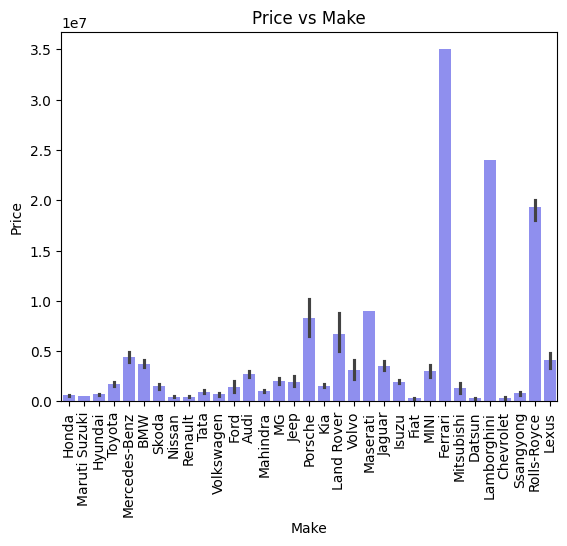

In [30]:
sns.barplot(x='Make',y='Price',data=df,estimator=np.mean,color='blue',alpha=0.5)
plt.title('Price vs Make')
plt.xticks(rotation=90)
plt.show()

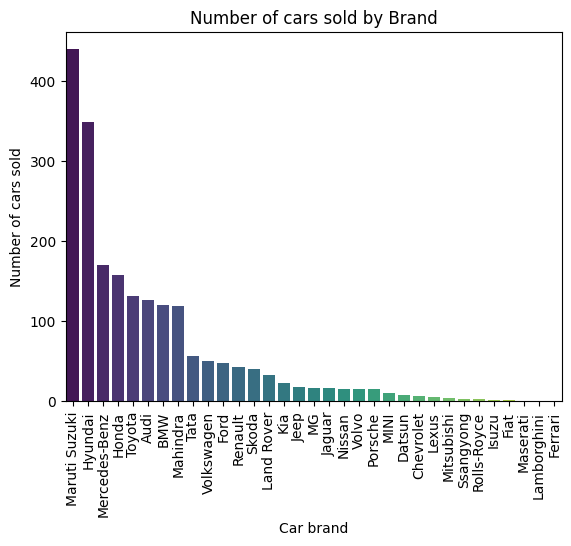

In [31]:
sns.countplot(x='Make',data=df,order=df['Make'].value_counts().index,palette='viridis')
plt.title('Number of cars sold by Brand')
plt.xticks(rotation=90)
plt.xlabel('Car brand')
plt.ylabel('Number of cars sold')
plt.show()

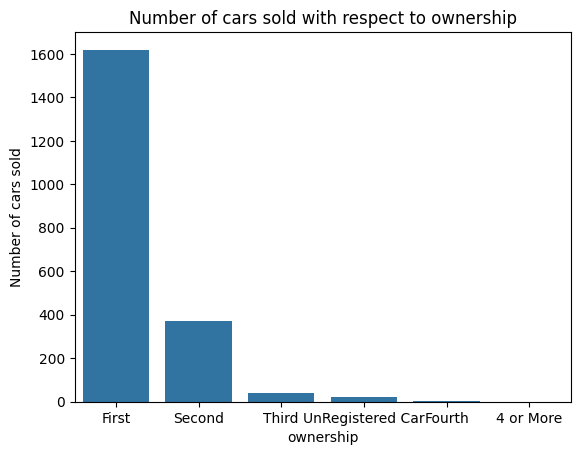

In [32]:
sns.countplot(x='Owner',data=df,order=df['Owner'].value_counts().index)
plt.title('Number of cars sold with respect to ownership')
plt.xlabel('ownership')
plt.ylabel('Number of cars sold')
plt.show()

Text(0, 0.5, 'Number of cars sold')

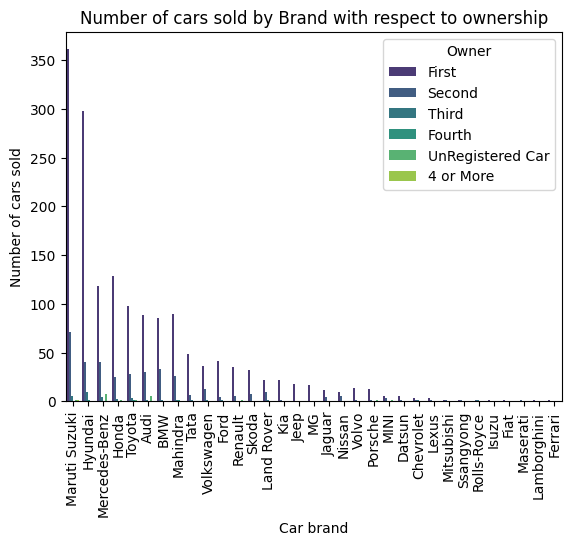

In [33]:
sns.countplot(x='Make',hue='Owner',data=df,order=df['Make'].value_counts().index,palette='viridis')
plt.title('Number of cars sold by Brand with respect to ownership')
plt.xticks(rotation=90)
plt.xlabel('Car brand')
plt.ylabel('Number of cars sold')

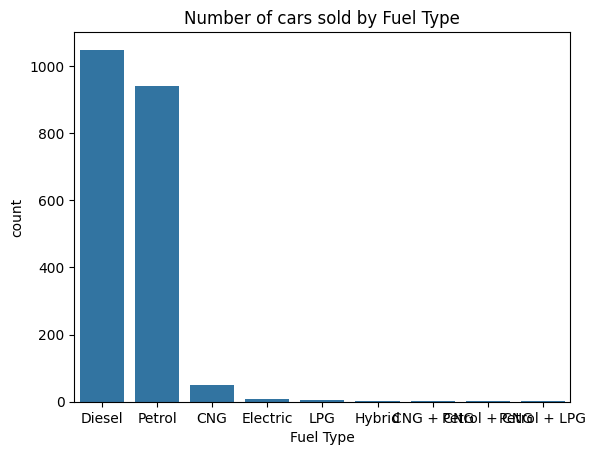

In [34]:
sns.countplot(x='Fuel Type',data=df,order=df['Fuel Type'].value_counts().index)
plt.title('Number of cars sold by Fuel Type')
plt.show()

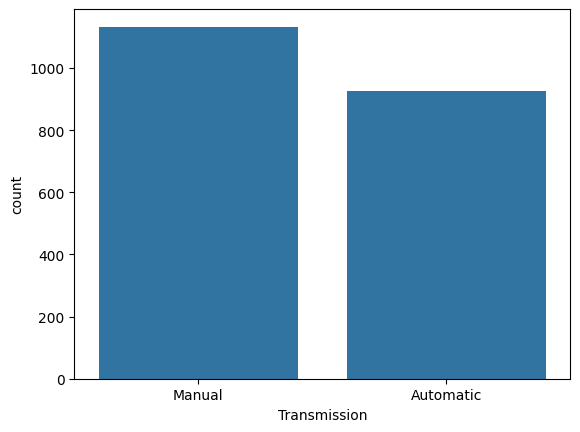

In [35]:
sns.countplot(x='Transmission',data=df)
plt.show()

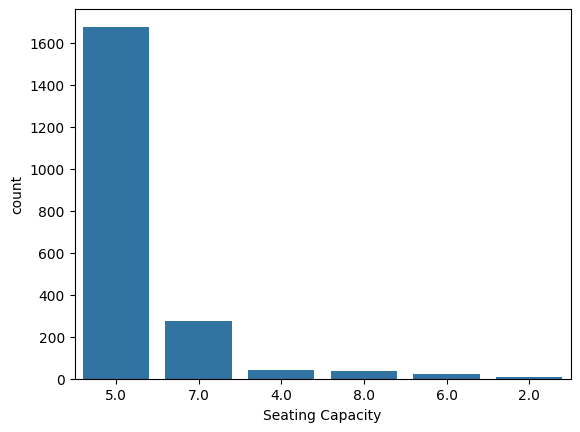

In [36]:
sns.countplot(x='Seating Capacity',data=df,order=df['Seating Capacity'].value_counts().index)
plt.show()

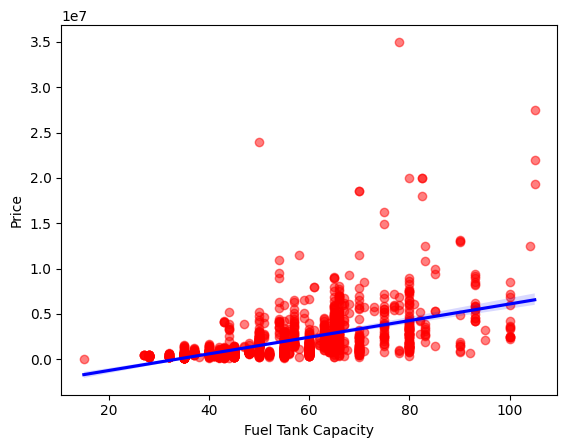

In [37]:
sns.regplot(x='Fuel Tank Capacity',y='Price',data=df,scatter_kws={'color':'red','alpha':0.5},line_kws={'color':'blue'})
plt.show()

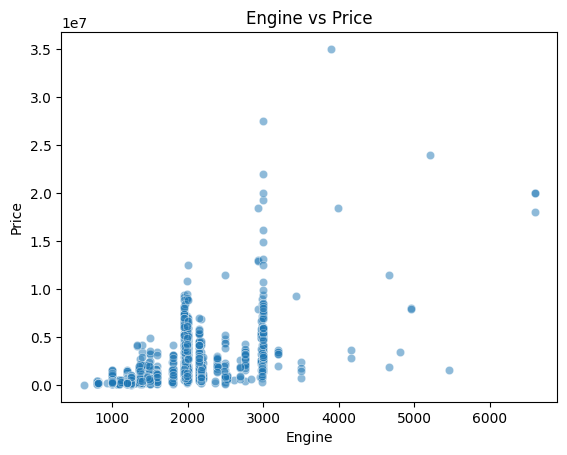

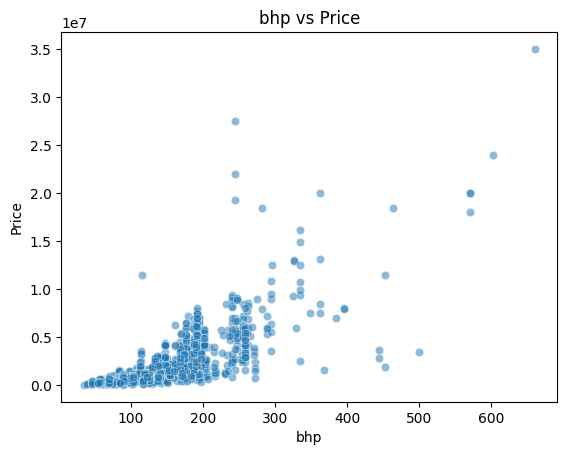

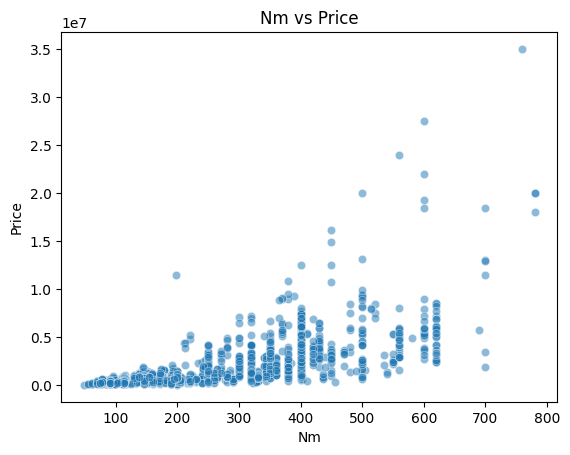

In [38]:
features = ['Engine','bhp','Nm']
for col in features:
  sns.scatterplot(x=col,y='Price',data=df,alpha=0.5)
  plt.title(f'{col} vs Price')
  plt.show()

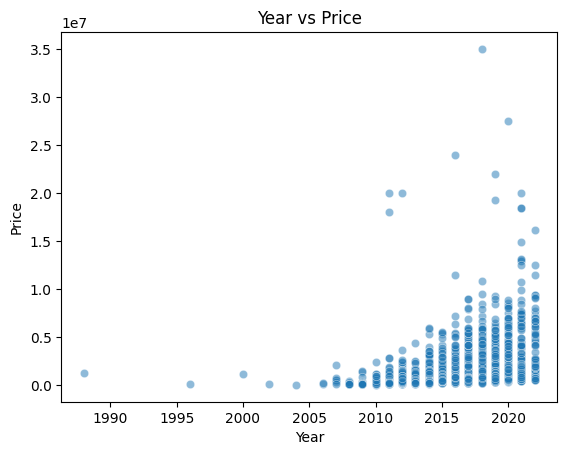

In [39]:
sns.scatterplot(x='Year',y='Price',data=df,alpha=0.5)
plt.title('Year vs Price')
plt.show()

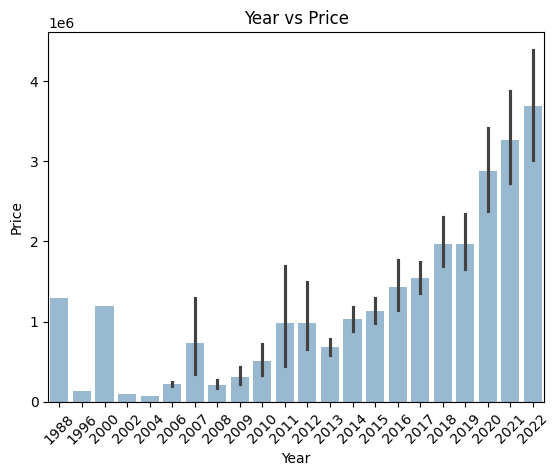

In [40]:
sns.barplot(x='Year',y='Price',data=df,estimator=np.mean,alpha=0.5)
plt.title('Year vs Price')
plt.xticks(rotation=45)
plt.show()

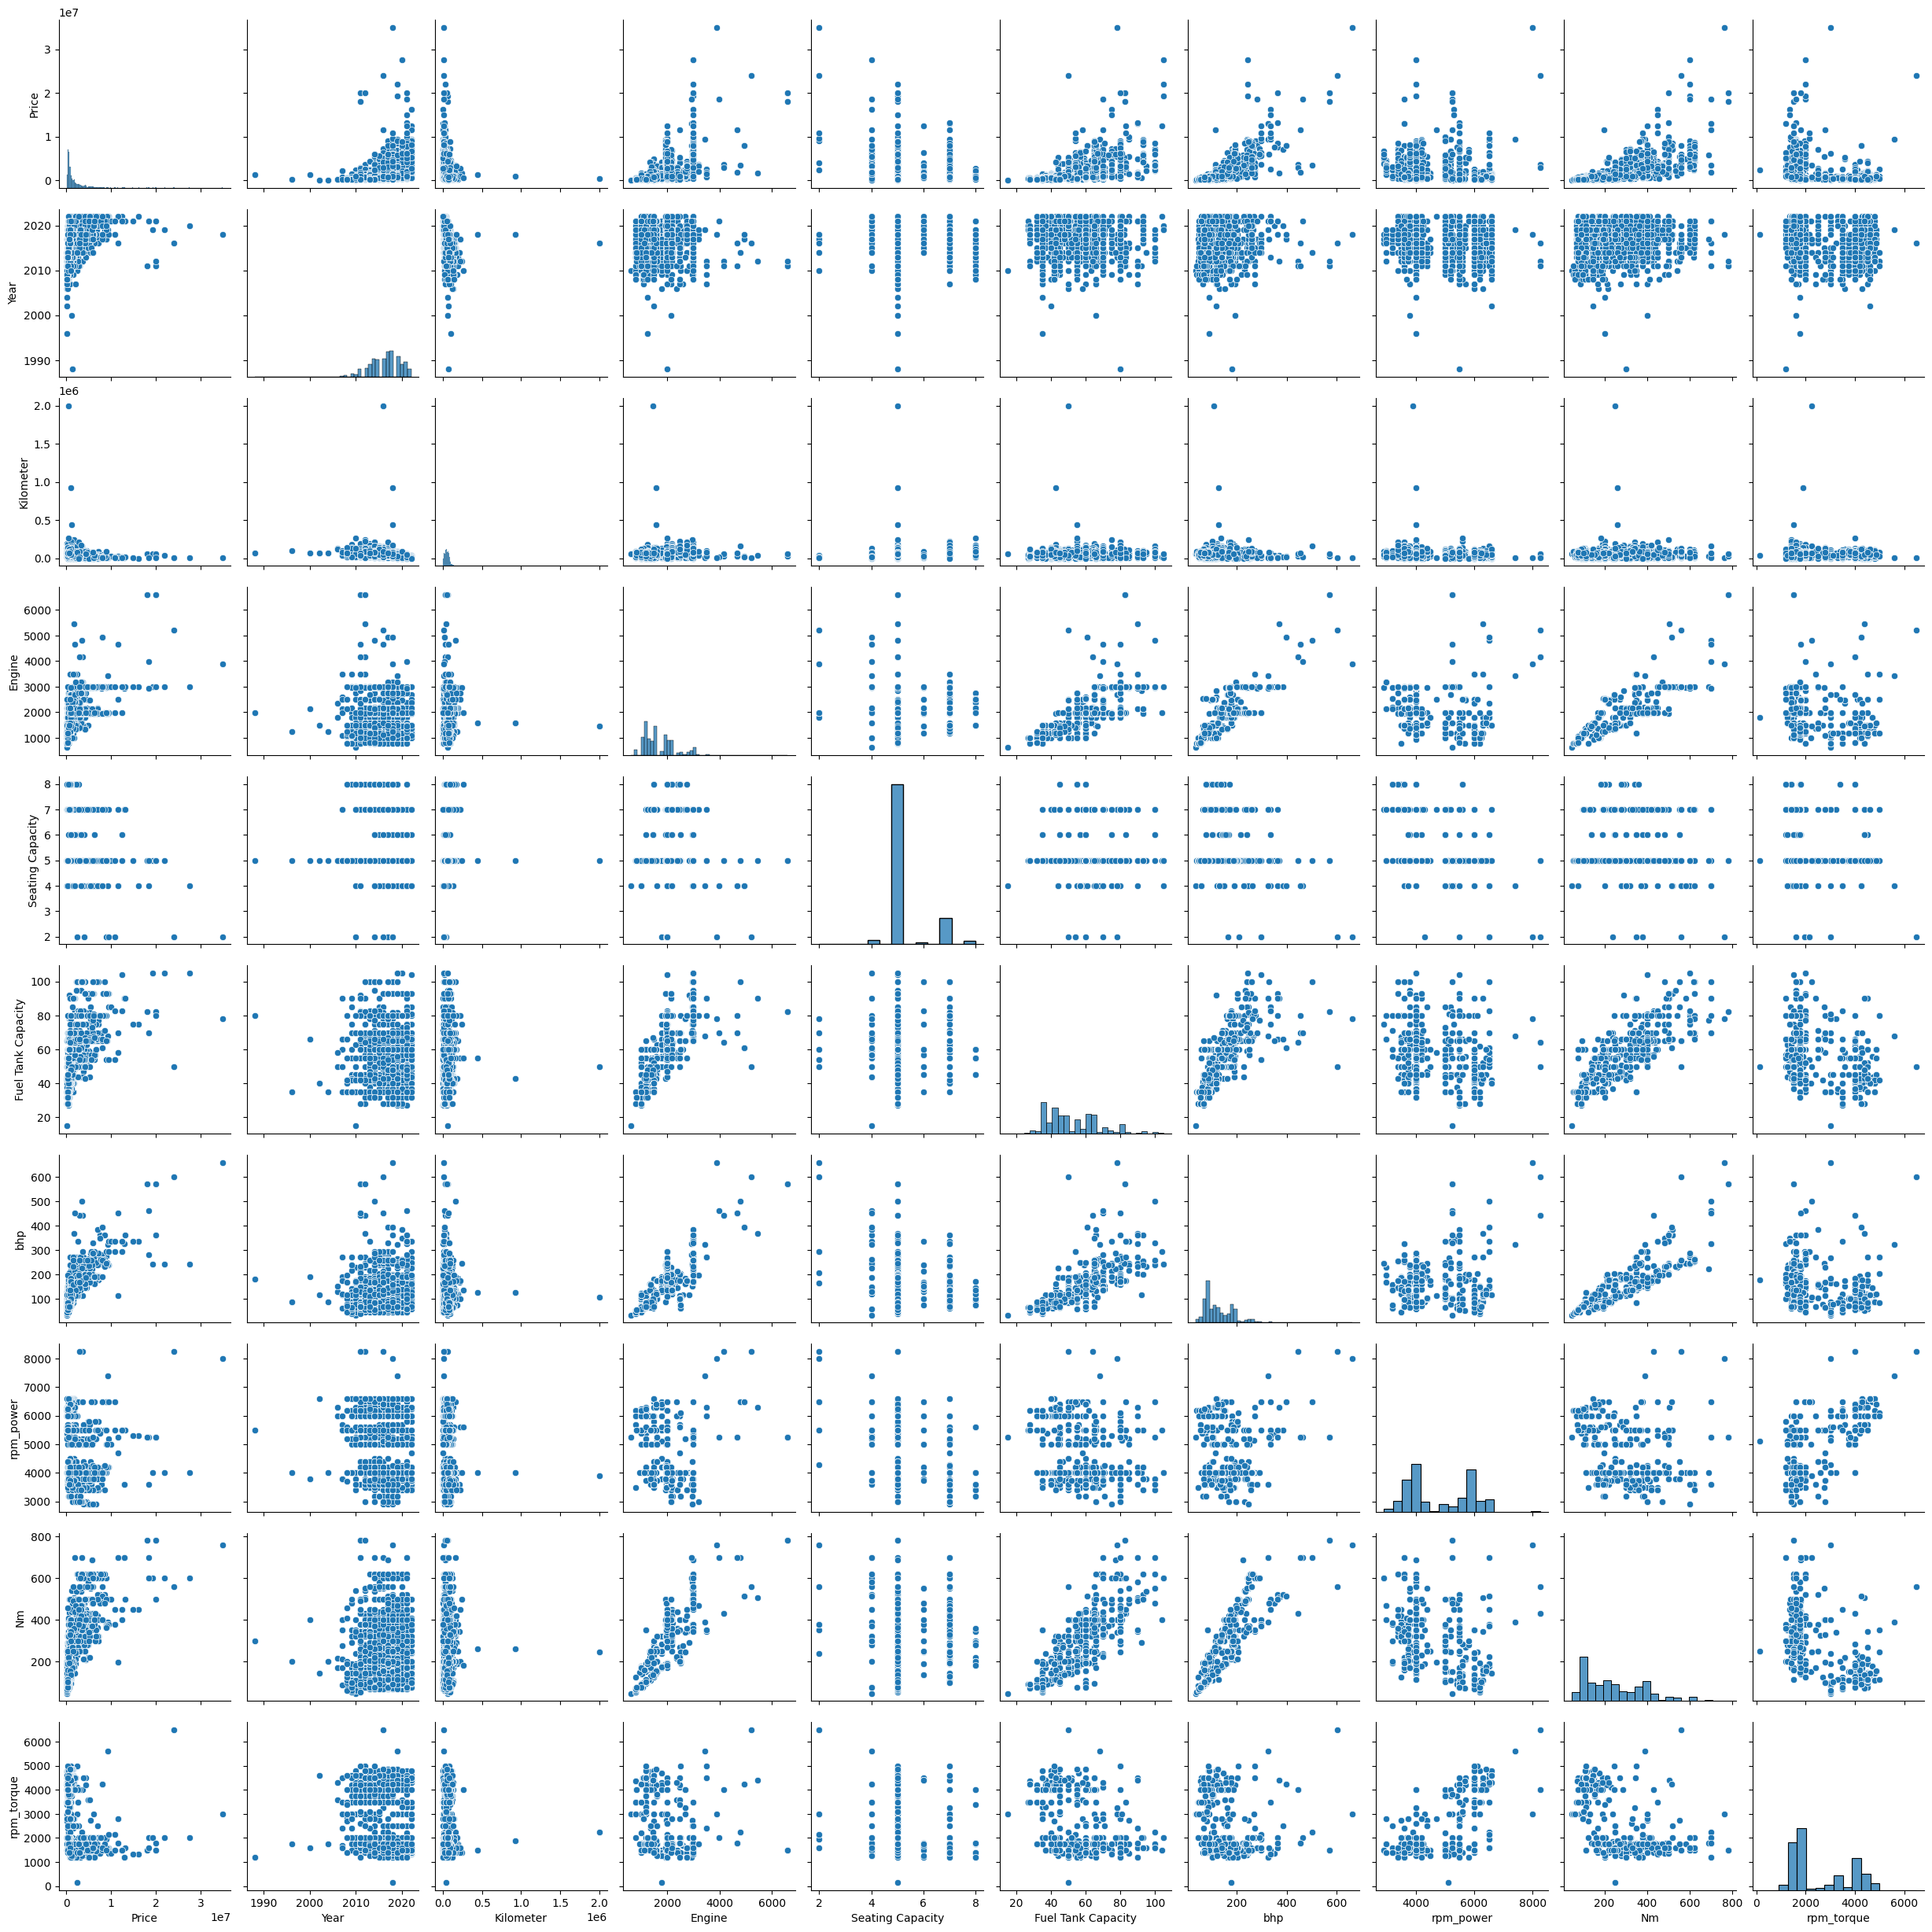

In [41]:
sns.pairplot(df)

## EDA Results  

From the exploratory analysis, several important insights emerged:  

1. **Brand & Market Position**  
   - Premium brands (e.g., BMW, Mercedes) consistently show higher resale prices.  
   - Mass-market brands (e.g., Maruti, Hyundai) dominate sales volume but at lower price points.  

2. **Ownership Trends**  
   - First-owner cars retain the highest resale value.  
   - Cars with multiple past owners show significant depreciation, confirming buyer preference for lower-ownership vehicles.  

3. **Fuel & Transmission**  
   - Petrol and diesel dominate the market; alternative fuels (CNG, Electric) are rare in this dataset.  
   - Manual transmission cars are more common, but automatic cars generally command higher prices.  

4. **Capacity & Design Features**  
   - SUVs (higher seating capacity, bigger engines, larger fuel tanks) tend to have higher resale value.  
   - Smaller hatchbacks are priced lower but appear more frequently in the data.  

5. **Performance Features**  
   - Strong positive correlation between **Engine size, Power (bhp), Torque (Nm)** and resale price.  
   - Cars with higher specs clearly retain more value, reflecting performance-driven pricing.  

6. **Temporal Trends (Depreciation)**  
   - As expected, **car price decreases with age**. Newer cars (recent model years) fetch higher resale prices.  
   - However, some luxury models retain value longer, showing brand-driven depreciation patterns.  

7. **Overall Takeaway**  
   - Price is not driven by one single factor — it is shaped by a combination of **brand reputation, ownership history, performance specifications, and age of the car**.  
   - These insights help validate the features selected for modeling and confirm real-world business logic.  


Before training the model, categorical features must be converted into numeric form.  

- **Transmission** → Mapped to binary values (`0 = Manual`, `1 = Automatic`).  
- **Drivetrain, Make, Fuel Type, Owner** → Contain multiple categories, so I used **One-Hot Encoding** via `ColumnTransformer`:  
  - `drop='first'` → avoids the dummy variable trap (perfect multicollinearity).  
  - `handle_unknown='ignore'` → ensures the model won’t break on unseen categories during inference.  
- **x, y split** → Independent features (`x`) and target variable (`y = Price`).  

In [42]:
df['Transmission'] = df['Transmission'].map({'Manual':0,'Automatic':1})

In [43]:
df['Drivetrain'].unique()

array(['FWD', 'RWD', 'AWD'], dtype=object)

In [44]:
x=df.drop('Price',axis=1)
y=df['Price']

In [45]:
x_raw = x.copy()

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = ['Make','Drivetrain','Fuel Type','Owner']

ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first',handle_unknown='ignore'),categorical_cols)],remainder='passthrough')

x_encoded = ct.fit_transform(x)



In [47]:
encoded_cols = ct.get_feature_names_out()
x_encoded = pd.DataFrame(x_encoded.toarray(),columns=encoded_cols)

print(x_encoded.head())

   encoder__Make_BMW  encoder__Make_Chevrolet  encoder__Make_Datsun  \
0                0.0                      0.0                   0.0   
1                0.0                      0.0                   0.0   
2                0.0                      0.0                   0.0   
3                0.0                      0.0                   0.0   
4                0.0                      0.0                   0.0   

   encoder__Make_Ferrari  encoder__Make_Fiat  encoder__Make_Ford  \
0                    0.0                 0.0                 0.0   
1                    0.0                 0.0                 0.0   
2                    0.0                 0.0                 0.0   
3                    0.0                 0.0                 0.0   
4                    0.0                 0.0                 0.0   

   encoder__Make_Honda  encoder__Make_Hyundai  encoder__Make_Isuzu  \
0                  1.0                    0.0                  0.0   
1                  0.0  

In [48]:
x = x_encoded
y = df['Price']

In [49]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

With the features preprocessed and split into train/test sets, I trained a **Linear Regression model** as the baseline approach for predicting car prices.  

- **Training** → Fit the model on the training dataset.  
- **Prediction** → Generated price predictions on the test dataset.  
- **Evaluation Metrics**:  
  - **Mean Squared Error (MSE)** → Penalizes large errors heavily.  
  - **Mean Absolute Error (MAE)** → Gives average prediction error in price units, easy to interpret.  
  - **R² Score** → Explains the proportion of variance in car prices captured by the model.  

In [50]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred = model.predict(x_test)

In [52]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('Mean Squared Error:',mse)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2)

Mean Squared Error: 2405228679631.265
Mean Absolute Error: 662589.151233438
R2 Score: 0.6557212241779566


After building a baseline Linear Regression model, the next step was to **standardize the numeric features**.  

- **Why Scaling?**  
  - Linear models are sensitive to feature magnitude.  
  - Without scaling, variables like *Engine (CC)* and *Year* can dominate smaller features like *bhp* or *Fuel Tank Capacity*.  

### Preprocessing Pipeline  
- **Numerical Features** → Standardized using `StandardScaler`.  
- **Categorical Features** → Encoded using `OneHotEncoder` with `drop='first'` to avoid multicollinearity.  
- Combined with `ColumnTransformer` to create a clean preprocessing workflow.  

### Model Training  
- Retrained **Linear Regression** on the scaled dataset.  
- Evaluated using the same metrics: **R², MAE, MSE**.  

Scaling improves fairness across features and often leads to better stability in linear models.

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


categorical_cols = ['Make','Drivetrain','Fuel Type','Owner','Transmission']
numeric_cols = ['Year','Engine','Kilometer','Seating Capacity','Fuel Tank Capacity','bhp','rpm_power','Nm','rpm_torque']


ct_scaled = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numeric_cols),
        ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),categorical_cols)],
    remainder='passthrough'
)

x_scaled = ct_scaled.fit_transform(x_raw)



In [54]:
x_train_s,x_test_s,y_train_s,y_test_s = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [55]:
model_scaled = LinearRegression()
model_scaled.fit(x_train_s,y_train_s)

LinearRegression()

In [56]:
predictions = model_scaled.predict(x_test_s)

In [57]:
print("scaled r2 score: ",r2_score(y_test_s,predictions))
print("scaled MAE : ",mean_absolute_error(y_test_s,predictions))
print("scaled MSE : ",mean_squared_error(y_test_s,predictions))

scaled r2 score:  0.6557218241554914
scaled MAE :  662586.1405885754
scaled MSE :  2405224488018.9004


After training and evaluating the model, I tested it on a **custom car profile** to simulate how this system could be used in practice (e.g., in a car resale platform).

To make the workflow reusable, I created a `predict_price()` function:  
- Accepts car attributes (make, drivetrain, engine size, power, year, etc.).  
- Automatically transforms the input using the fitted preprocessing pipeline.  
- Returns the predicted resale price.

In [58]:
new_car = pd.DataFrame({
    'Make': ['Honda'],
    'Drivetrain': ['FWD'],
    'Fuel Type': ['Petrol'],
    'Owner': ['First'],
    'Transmission':['Manual'],
    'Kilometer': [10000],
    'rpm_power':[5000],
    'rpm_torque':[2500],
    'Year': [2017],
    'Engine': [1198],
    'bhp': [87],
    'Nm': [109],
    'Seating Capacity': [5],
    'Fuel Tank Capacity': [35]
})

In [59]:
new_car_transformed = ct_scaled.transform(new_car)

In [60]:
predicted_price = model_scaled.predict(new_car_transformed)

In [61]:
print("Predicted Price: ",predicted_price[0])

Predicted Price:  942756.5952068395


In [62]:
def predict_price(make, drivetrain, fuel, owner, transmission,
                  year, engine, bhp, nm, seating, fuel_tank, kilometer):
    # Create DataFrame
    new_car = pd.DataFrame({
        'Make': [make],
        'Drivetrain': [drivetrain],
        'Fuel Type': [fuel],
        'Owner': [owner],
        'Transmission': [transmission],
        'Year': [year],
        'Engine': [engine],
        'bhp': [bhp],
        'Nm': [nm],
        'Seating Capacity': [seating],
        'Fuel Tank Capacity': [fuel_tank],
        'Kilometer': [kilometer]
    })

    # Transform using the fitted ColumnTransformer
    new_car_transformed = ct_scaled.transform(new_car)

    # Predict
    predicted_price = model_scaled.predict(new_car_transformed)
    return predicted_price[0]


 To improve over the baseline Linear Regression, I trained a **Random Forest Regressor**:  
- Captures **non-linear relationships** between features and price.  
- Naturally handles feature interactions and reduces overfitting through ensembling.  

### Results  
- Reported R² score on the test set.  
- Predicted resale price for the same Honda (2017, Petrol, Manual, 10k km).  




In [63]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(x_train_s,y_train_s)


RandomForestRegressor(random_state=42)

In [64]:
print("RF R2: ",rf_model.score(x_test_s,y_test_s))

RF R2:  0.8301116163826122


In [65]:
new_car = pd.DataFrame({
    'Make': ['Honda'],
    'Drivetrain': ['FWD'],
    'Fuel Type': ['Petrol'],
    'Owner': ['First'],
    'Transmission':['Manual'],
    'Kilometer': [10000],
    'rpm_power':[5000],
    'rpm_torque':[2500],
    'Year': [2017],
    'Engine': [1198],
    'bhp': [87],
    'Nm': [109],
    'Seating Capacity': [5],
    'Fuel Tank Capacity': [35]
})


In [66]:
new_car_transformed = ct_scaled.transform(new_car)


In [67]:
predicted_price_rf = rf_model.predict(new_car_transformed)
print("predicted Price (RF): " ,predicted_price_rf[0])

predicted Price (RF):  496049.97


I experimented with three approaches to predict car prices:  

1. **Baseline Linear Regression**
   - r2_score: 0.65
   - Simple, interpretable model.  
   - Gave a decent R² score, but errors were relatively high.  

2. **Scaled Linear Regression**
   - r2_score: 0.65
   - Applied feature scaling for fairness across variables.  
   - Performance was almost the same as the baseline (no major improvement).  

3. **Random Forest Regressor**
   - r2_score: 0.83
   - Captured non-linear patterns and feature interactions.  
   - Achieved higher R² and lower errors compared to Linear Regression.  
   - Delivered the most reliable price predictions for new cars.  

### Final Takeaway  
- **Linear Regression** → Good baseline, easy to explain.  
- **Random Forest** → Stronger predictive accuracy, better suited for real-world deployment.

  Since the **Random Forest Regressor** gave the best results, I built a reusable function `predictprice()` that:  
- Accepts car details (make, fuel, engine, year, etc.) as input.  
- Applies the preprocessing pipeline (`ColumnTransformer`).  
- Returns the predicted resale price using the trained Random Forest model.  

  


In [70]:
def predictprice(make, drivetrain, fuel, owner, transmission,
                  year, engine, bhp, nm, seating, fuel_tank, kilometer,rpm_power,rpm_torque):
    # Create DataFrame
    new_car = pd.DataFrame({
        'Make': [make],
        'Drivetrain': [drivetrain],
        'Fuel Type': [fuel],
        'Owner': [owner],
        'Transmission': [transmission],
        'Year': [year],
        'Engine': [engine],
        'bhp': [bhp],
        'Nm': [nm],
        'Seating Capacity': [seating],
        'Fuel Tank Capacity': [fuel_tank],
        'Kilometer': [kilometer],
        'rpm_power':[rpm_power],
        'rpm_torque':[rpm_torque]
    })

    # Transform using the fitted ColumnTransformer
    new_car_transformed = ct_scaled.transform(new_car)

    # Predict
    predicted_price = rf_model.predict(new_car_transformed)
    return predicted_price[0]

In [71]:
predictprice('Honda','FWD','Petrol','First','Manual',2017,1198,87,109,5,35,10000,5000,2500)

np.float64(496049.97)